In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

# Taking some Insight of the data

In [3]:
print(df.isna().sum())
df.head()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


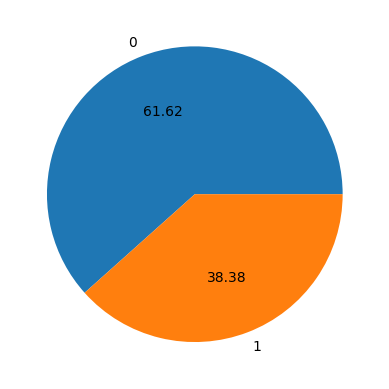

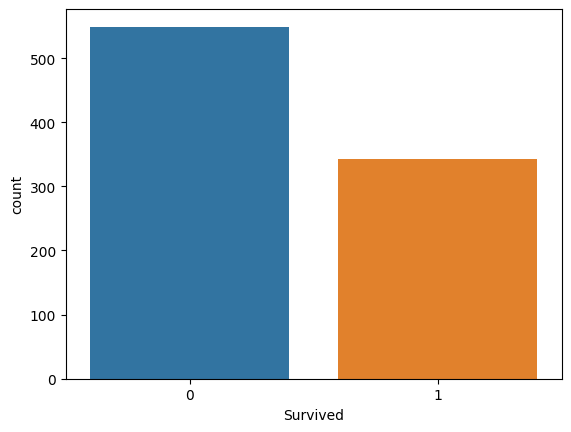

In [4]:

df['Survived'].value_counts() 
labels = [0, 1]
plt.pie(df['Survived'].value_counts(), autopct ='%.2f', labels=labels)
plt.show()
sns.countplot(x = 'Survived', data = df)
plt.show()

 <b>Conclusion from above analysis:</b>
 
 Out of 891 members, 549 died and 342 survived. <br>
 Survival to Death ratio = 0.622. <br>
 Total Survival percent: 38.38

In [5]:
print("Male Survival: ", ((df['Sex']=='male') & (df['Survived']==1)).sum())
print("Female Survival:", ((df['Sex']=='female') & (df['Survived']==1)).sum())

Male Survival:  109
Female Survival: 233


Sex
male      577
female    314
Name: count, dtype: int64

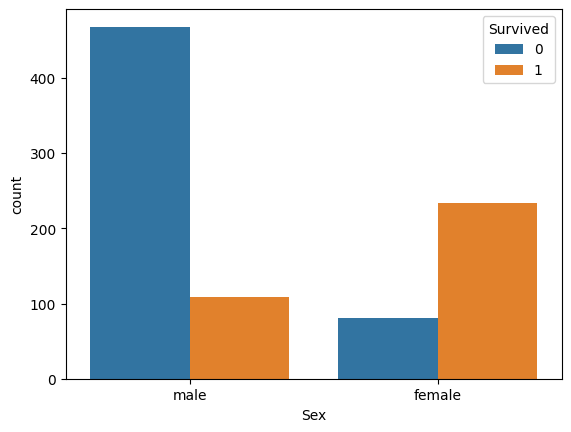

In [6]:
sns.countplot(x = 'Sex', hue= 'Survived', data = df)
df['Sex'].value_counts()


<b>Conclusion from above analysis: </b> <br>
    Out of 577 male 109 survived and 468 died. <br>
    Male Survival to Death Ratio: 0.232.<br>
    Male Survival percent: 18.89% <br>
    Out of 314 female, 233 survived and 81 died. <br>
    Female Survival to Death Ratio: 2.87. <br>
    Female Survival percent: 74.20%



# Analysing Impact of Pclass and Embarked as a Surviving factor

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

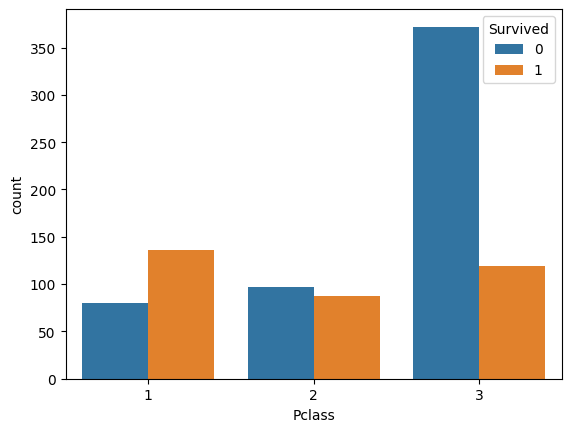

In [7]:
print(df['Pclass'].value_counts())
sns.countplot(x= 'Pclass',hue='Survived', data=df)

In [8]:
(df['Pclass'] ==3).sum()

491

In [9]:
((df['Pclass']==3) & (df['Survived']==1)).sum()

119

In Pclass 1: Out of 216 people 136 people survived and 80 people died. Survival Rate = 0.629 <br>
In Pclass 2: Out of 184 people, 87 survived and 97 died. Survival Rate = 0.472<br>
In Pclass 3: Out of 491 people, 119 survived and 372 died. Survival Rate = 0.242

In [10]:
# fig, axis = plt.subplots(2, 2)
# axis[0] = plt.pie(df['Pclass'].value_counts(), labels = df['Pclass'].unique())


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
group_by_sex = df.groupby('Sex')

In [13]:
group_by_sex['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [14]:
group_by_class = df.groupby('Pclass')

In [15]:
group_by_class['Sex'].describe()

,count,unique,top,freq
Pclass,,,,
1,216,2,male,122
2,184,2,male,108
3,491,2,male,347


In [17]:
# df['Fare'], df['Survived'], hue = df['Sex'], alpha = 0.3